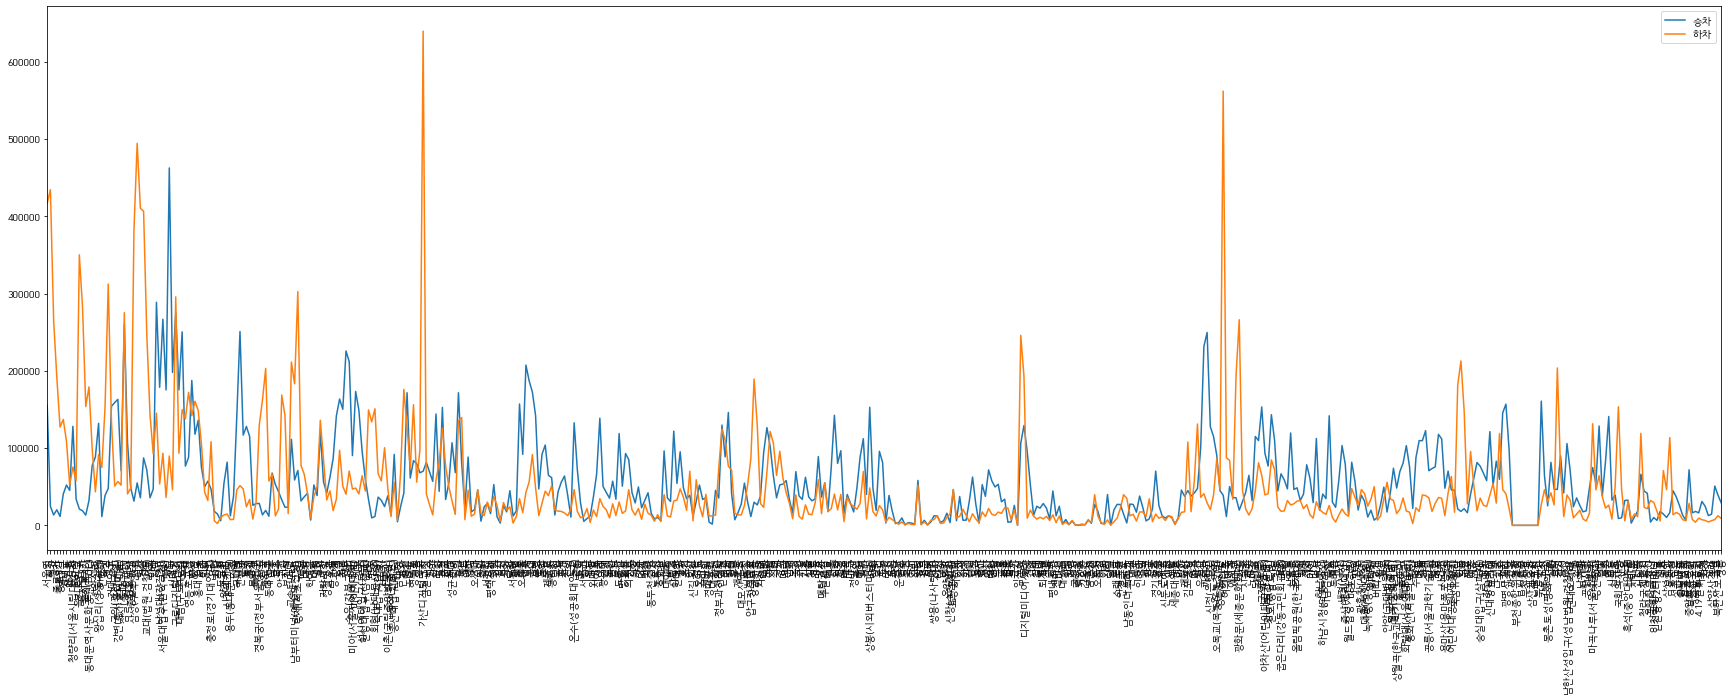

In [90]:
import csv
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = r'C:\Windows\Fonts\HANDotum.ttf'
font = font_manager.FontProperties(fname=font_path, size=16).get_name()
rc('font', family=font)

f = open('시간대별.csv', 'r', encoding='cp949')
data= csv.reader(f)
header = next(data)
next(data)

station_ride = {}
for row in data:
    for i in range(10,14, 2):
        if row[3] not in station_ride:
            station_ride[row[3]]=[]
            station_ride[row[3]].append(int(row[i]))
            station_ride[row[3]].append(int(row[i+1]))
        else:
            station_ride[row[3]][0]+=int(row[i])
            station_ride[row[3]][1]+=int(row[i+1])

#print(station_ride)
station = []
rides = []
quits = []
cnt=0
# for key, value in station_ride.items():
#     print('{} : {}'.format(key, value))


for key, num in station_ride.items():
    #cnt_max=611
    if cnt>=611:
        break
    station.append(key)
    rides.append(num[0])
    quits.append(num[1])
    cnt+=1
        
width=0.35
plt.figure(figsize=(30,10))
plt.plot(station, rides, label='승차')
plt.plot(station, quits, label='하차')
#plt.bar(range(1,cnt+1), rides,width=1, label='승차')
#plt.bar(range(1,(cnt*2)+1,2), quits, width=1, label='하차')
plt.xticks(rotation=90)
plt.xlim([0,cnt-1])
plt.legend()
plt.show()